In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import numpy as np
import os

In [40]:
bridges = pd.read_csv(os.path.join('data','bridges.csv'))
bridges = bridges[~bridges['MATERIAL'].isna()]

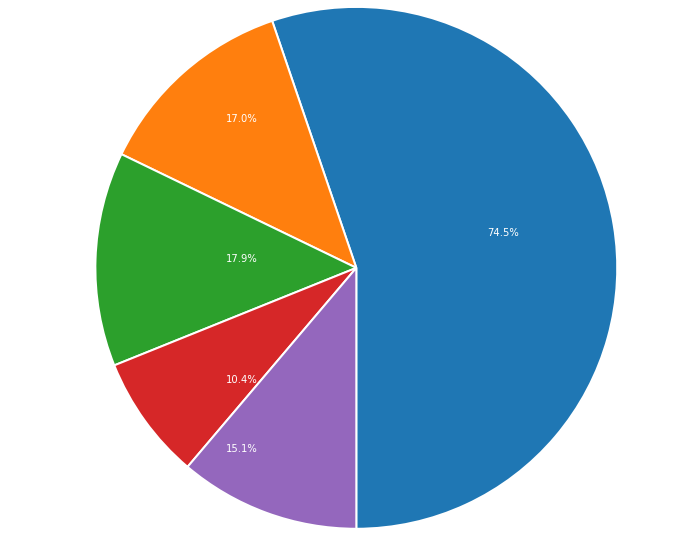

In [152]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
categories = ['steel','crafts','modern','iron','wood']
nums = [0.745, 0.17, 0.179, 0.104, 0.151]
patches, texts =ax.pie(nums,
                       labels =categories, 
                       #  autopct=lambda p : '{:,.0f}%'.format(p), 
                       startangle=-90, 
                       wedgeprops={'edgecolor':'white',"linewidth":2},
                       radius=2)
for text in texts:
    text.set_color('w')
    text.set_fontsize(16)
    

for i, patch in enumerate(patches):
    ang = (patch.theta2 - patch.theta1)/2. + patch.theta1

    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    patch.set_edgecolor('w')
    ax.annotate(
        str(nums[i]*100)+"%",
        xy = (x, y),
        xytext = (np.sign(x), 1.5*y),
        color = "w"
    )

/var/folders/rj/3hb6b83x2tjd4kzvbypmj6cc0000gn/T/ipykernel_34834/3947993789.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","0%","20%","40%","60%"])


[]

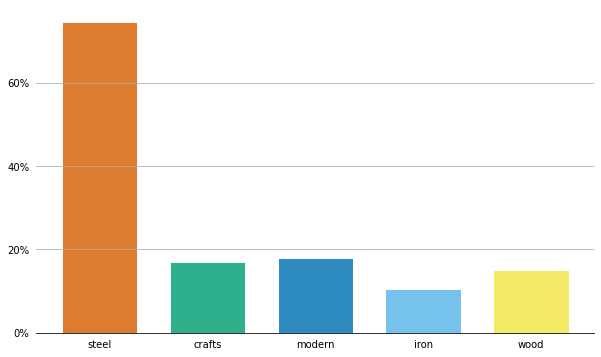

In [107]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
categories = ['steel','crafts','modern','iron','wood']
nums = [0.745, 0.17, 0.179, 0.104, 0.151]
ax.bar(
    categories,
    nums,
    width = 0.7,
    color = ["#D55E00D0", "#009E73D0", "#0072B2D0", "#56B4E9D0", "#F0E442D0"],
    edgecolor = 'w',
    linewidth = 1
    )
ax.spines[:].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.grid()
ax.spines['bottom'].set_position(('data',0))
ax.set_yticklabels(["","0%","20%","40%","60%"])
ax.plot()

In [108]:
from statsmodels.graphics.mosaicplot import mosaic

[]

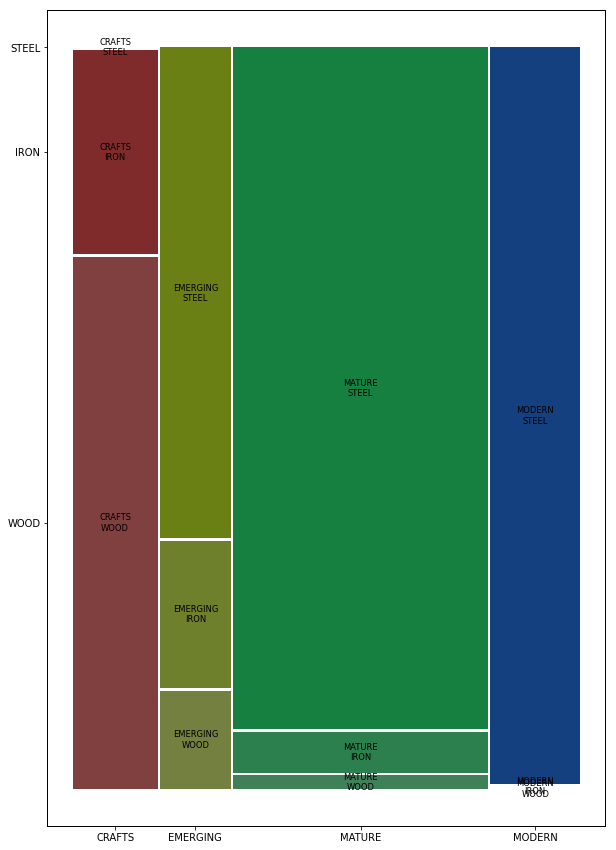

In [115]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
mosaic(bridges, ["ERECTED","MATERIAL"],ax=ax)
ax.plot()

In [166]:
piechartdf = bridges[['ERECTED','MATERIAL','IDENTIF']].groupby(['ERECTED','MATERIAL']).agg('count').reset_index()
piechartdf['Names'] = piechartdf['ERECTED']+" ("+piechartdf['MATERIAL']+")"

In [187]:
fig = px.sunburst(
    bridges,
    path=['ERECTED','MATERIAL']
)
fig.update_traces(
    textinfo='label+value',
    rotation=90
    )
fig.update_layout(
    margin=dict(
        l=0,
        r=0,
        t=0,
        b=0
    ),
    width=500
)
fig.show()

/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Applications/Utilities/anaconda/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [186]:
fig = px.pie(
    piechartdf,
    values='IDENTIF',
    names = 'Names',
   
    # facet_row = 'MATERIAL'
)
fig.update_traces(
    textinfo='value+label',
    # visible="legendonly"
     legendgroup = "ERECTED",
     marker=dict(
        line = dict(
            color = "white",
            width = 1 
        )
     )
)
fig.update_layout(
    margin = dict(
        r=0,
        l=10,
        t=0,
        b=0
    ),
    width=500,
    showlegend = False
)

In [317]:
sankeyBridgesdf

,MATERIAL,LENGTH,ERECTED,RIVER,count,color
0,IRON,MEDIUM,CRAFTS,A,3,lightorange
1,IRON,MEDIUM,CRAFTS,M,2,lightorange
2,IRON,MEDIUM,EMERGING,M,1,lightorange
3,STEEL,LONG,EMERGING,O,1,lightblue
4,STEEL,LONG,MATURE,A,7,lightblue
5,STEEL,LONG,MATURE,M,7,lightblue
6,STEEL,LONG,MATURE,O,1,lightblue
7,STEEL,LONG,MODERN,A,1,lightblue
8,STEEL,LONG,MODERN,M,2,lightblue
9,STEEL,LONG,MODERN,O,2,lightblue


In [337]:
sankeyBridgesdf = bridges[["MATERIAL","LENGTH","ERECTED","RIVER","IDENTIF"]].groupby(["MATERIAL","LENGTH","ERECTED","RIVER"]).agg('count')
sankeyBridgesdf.columns = ['count']
sankeyBridgesdf = sankeyBridgesdf.reset_index()
sankeyBridgesdf['color'] = sankeyBridgesdf['MATERIAL'].apply(lambda x: "lightgreen" if x=="WOOD" else("lightblue" if x=="STEEL" else "lightorange"))


In [338]:
nodes = sankeyBridgesdf['MATERIAL'].unique().tolist()+sankeyBridgesdf['LENGTH'].unique().tolist()+sankeyBridgesdf['ERECTED'].unique().tolist()+sankeyBridgesdf['RIVER'].unique().tolist()

In [339]:
sankeyBridgesdf['MATERIAL'].replace({'IRON':0,"STEEL":1,"WOOD":2},inplace=True)
sankeyBridgesdf['LENGTH'].replace({'MEDIUM':3,"LONG":4,"SHORT":5},inplace=True)
sankeyBridgesdf['ERECTED'].replace({'CRAFTS':6,"EMERGING":7,"MATURE":8,"MODERN":9},inplace=True)
sankeyBridgesdf['RIVER'].replace({'A':10,"M":11,"O":12,"Y":13},inplace=True)

In [342]:
source = [0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 3, 3, 3, 5,6, 6, 7, 7, 7, 8, 8, 8,
 8, 9, 9, 9, 7, 8, 8, 8, 9, 9, 9, 8, 9, 9, 9, 6, 6, 7, 8, 6]
target = [3, 3, 4, 5, 3, 5, 6, 7, 7, 8, 9, 7, 8, 9, 8, 9, 6, 7, 8, 6,10, 11, 11, 10,
 11, 10, 11, 12, 13, 10, 11, 12, 12, 10, 11, 12, 10, 11, 12, 10, 10, 11, 12, 10, 11, 10, 10, 10]
value =  [3, 9, 7, 4, 4, 1, 2, 1, 2, 4, 3, 1, 3, 3, 1, 3, 2, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
color = ["#DF9E9B","#99BADF","#99BADF","#99BADF","#D8E7CA","#D8E7CA",'#DF9E9B',
 '#DF9E9B',  '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF',
 '#99BADF', '#99BADF', '#D8E7CA', '#D8E7CA', '#D8E7CA', '#D8E7CA', '#DF9E9B',
 '#DF9E9B', '#DF9E9B', '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF',
 '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF',
 '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF', '#99BADF',
 '#99BADF', '#D8E7CA', '#D8E7CA', '#D8E7CA', '#D8E7CA', '#D8E7CA' ]

In [348]:
fig = go.Figure(data = [go.Sankey(
    node = dict(
        pad = 15,
        thickness = 15,
        line = dict(
            color = "white",
            width = 1
        ),
        label = nodes,
        color = 'slategrey'
    ),
    link = dict(
        source = source,
        target = target,
        value = value,
        color = color
    )
)])

fig.update_layout(
    margin = dict(
        t=20,
        b=20,
        l=10,
        r=10
    )
)
fig.show()